In [3]:
import pandas as pd
import numpy as np

In [5]:
# We'll be using our college scorecard dataset in this tutorial.
college_scorecard = pd.read_csv(
    './data/college-scorecard-data-scrubbed.csv', 
    encoding='latin-1')

In [3]:
flights = pd.read_csv('./data/flight_sample.csv')
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAXI_IN,TAXI_OUT,DISTANCE
0,2015,8,19,3,EV,3260,7.0,20.0,1091
1,2015,9,23,3,WN,3050,4.0,9.0,837
2,2015,10,16,5,AA,1382,13.0,25.0,761
3,2015,1,19,1,WN,4274,5.0,23.0,1547
4,2015,4,22,3,WN,2237,5.0,18.0,872


## Activity

##### Aggregation operations

1. Describe only numerical values of flights dataset. 
2. Describe only the non-numerical values of the flights dataset. 
3. Describe all the columns of the flights dataset. 

##### Selection 

1. Extract only the flight details of the United Airlines (UA). No groupby required for this question. Remind yourself how you did selection of information based on a column. 

##### GroupBY

1. What is the median monthly DISTANCE, TAXI_IN times and TAXI_OUT times for all airlines? 
2. How about the median monthly DISTANCE, TAXI_IN times and TAXI_OUT summary statistics for only United Airlines (UA)? 
3. Instead of doing this for each airline, what can you do so that you get all per airline per month summary statistics? 

In [4]:
#Selection based on 'AIRLINE' is United Airlines (UA)
UA_flights = flights[flights['AIRLINE'] == 'UA']

In [5]:
UA_flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAXI_IN,TAXI_OUT,DISTANCE
10,2015,4,27,1,UA,1755,11.0,19.0,2704
17,2015,12,29,2,UA,1285,7.0,14.0,862
21,2015,5,2,6,UA,589,10.0,20.0,925
34,2015,2,12,4,UA,1244,10.0,11.0,2454
35,2015,1,10,6,UA,1721,5.0,10.0,967


In [6]:
# GroupBy
flights_by_month = flights.groupby(['MONTH'])
# Selection and Aggregation
flights_by_month['DISTANCE','TAXI_IN','TAXI_OUT'].median()

,DISTANCE,TAXI_IN,TAXI_OUT
MONTH,,,
1,627.0,6.0,14.0
2,651.0,6.0,14.0
3,667.0,6.0,14.0
4,641.5,6.0,14.0
5,678.0,6.0,13.0
6,646.0,6.0,14.0
7,697.0,6.0,14.0
8,670.0,6.0,14.0
9,618.5,6.0,14.0


In [7]:
UA_flights_by_month = UA_flights.groupby(['MONTH'])
UA_flights_by_month['DISTANCE','TAXI_IN','TAXI_OUT'].median()

,DISTANCE,TAXI_IN,TAXI_OUT
MONTH,,,
1,967.0,7.0,14.0
2,1066.5,7.0,17.0
3,1009.0,8.0,14.5
4,1201.0,7.0,16.0
5,967.0,7.0,16.0
6,1001.0,7.0,14.0
7,1341.0,7.0,14.0
8,1010.0,7.0,15.0
9,978.0,7.0,14.0


In [8]:
flights_by_airline_month = flights.groupby(['AIRLINE','MONTH'])
summary_by_airline_month = flights_by_airline_month['DISTANCE','TAXI_IN','TAXI_OUT'].median()

In [11]:
summary_by_airline_month.loc['HA']

,DISTANCE,TAXI_IN,TAXI_OUT
MONTH,,,
1,163.0,6.0,12.0
2,189.5,7.5,11.5
3,163.0,5.0,11.0
4,216.0,7.0,10.0
5,189.5,6.5,10.0
6,216.0,6.0,11.0
7,121.0,6.0,9.0
8,2338.0,6.0,15.0
9,216.0,6.0,13.0


## Activity: 

We will work again on the `college-loan-default-rates.csv` and `college-scorecard-data-scrubbed.csv` datasets. 

Use `aggregate()` method to produce

1. The average, minimum and maximum `full_time_retention_rate_4_year` per state using `college-scorecard-data-scrubbed.csv` dataset. 
    * After producing the above summary statistics, make sure you rename your columns for average, minimum and maximum as `Avg. Retention`, `Low Retention`, and `High Retention` respectively. 
2. Produce per state and city, minimum and maximum for the `sat_average` column and average for the `full_time_retention_rate_4_year` column. 

In [12]:
college_scorecard = pd.read_csv(
    './data/college-scorecard-data-scrubbed.csv', 
    encoding='latin-1')

In [9]:
# Solution for number 1
college_by_state = college_scorecard.groupby(['state'])
college_by_state['full_time_retention_rate_4_year'].aggregate(
    [np.mean, np.max, np.min]).rename(columns = {'mean':'Avg. Retention',
                                                'amax': 'High Retention',
                                                'amin':'Low Retention'})

,Avg. Retention,High Retention,Low Retention
state,,,
AK,0.663240,0.7756,0.3333
AL,0.615436,1.0000,0.0000
AR,0.650996,0.8667,0.2564
AS,1.000000,1.0000,1.0000
AZ,0.679600,1.0000,0.2000
CA,0.760156,1.0000,0.0000
CO,0.578742,0.9406,0.0000
CT,0.790324,0.9838,0.3846
DC,0.707667,0.9630,0.3333


In [11]:
# Solution for number 2
college_scorecard_by_state_city = college_scorecard.groupby(['state','city'])

summary_state_city = college_scorecard_by_state_city.aggregate(
        {'sat_average': [np.min, np.max, np.median], 
         'full_time_retention_rate_4_year': np.mean})

In [15]:
summary_state_city.loc['IN'].dropna()

sat_average                  \
                               amin    amax  median   
city                                                  
Anderson                     1048.0  1048.0  1048.0   
Angola                       1078.0  1078.0  1078.0   
Bloomington                  1198.0  1198.0  1198.0   
Crawfordsville               1128.0  1128.0  1128.0   
Evansville                   1001.0  1144.0  1072.5   
Fort Wayne                    965.0  1002.0   981.0   
Franklin                     1031.0  1031.0  1031.0   
Gary                          916.0   916.0   916.0   
Goshen                       1109.0  1109.0  1109.0   
Greencastle                  1213.0  1213.0  1213.0   
Hammond                       965.0   965.0   965.0   
Hanover                      1101.0  1101.0  1101.0   
Huntington                   1034.0  1034.0  1034.0   
Indianapolis                 1010.0  1205.0  1027.0   
Kokomo                        934.0   934.0   934.0   
Marion                       1081.0  1081.0  1081.0   
Mishawaka                    1040.0  1040.0  1040.0   
Muncie                       1066.0  1066.0  1066.0   
New Albany                    959.0   959.0   959.0   
North Manchester             1000.0  1000.0  1000.0   
Notre Dame                    969.0  1450.0  1144.0   
Oakland City                  960.0   960.0   960.0   
Rensselaer                    996.0   996.0   996.0   
Richmond                      943.0   943.0   943.0   
Saint Mary of the Woods       943.0   943.0   943.0   
South Bend                    942.0   942.0   942.0   
Terre Haute                   913.0  1308.0  1110.5   
Upland                       1184.0  1184.0  1184.0   
Valparaiso                   1155.0  1155.0  1155.0   
West Lafayette               1213.0  1213.0  1213.0   
Westville                     959.0   959.0   959.0   
Winona Lake                  1110.0  1110.0  1110.0   

                        full_time_retention_rate_4_year  
                                                   mean  
city                                                     
Anderson                                       0.746500  
Angola                                         0.723100  
Bloomington                                    0.890400  
Crawfordsville                                 0.892100  
Evansville                                     0.784750  
Fort Wayne                                     0.567140  
Franklin                                       0.794100  
Gary                                           0.665700  
Goshen                                         0.772500  
Greencastle                                    0.926700  
Hammond                                        0.735400  
Hanover                                        0.817400  
Huntington                                     0.862200  
Indianapolis                                   0.615517  
Kokomo                                         0.637000  
Marion                                         0.841200  
Mishawaka                                      0.812200  
Muncie                                         0.814100  
New Albany                                     0.616400  
North Manchester                               0.692100  
Notre Dame                                     0.830967  
Oakland City                                   0.698900  
Rensselaer                                     0.739900  
Richmond                                       0.736550  
Saint Mary of the Woods                        0.819700  
South Bend                                     0.658500  
Terre Haute                                    0.792000  
Upland                                         0.882400  
Valparaiso                                     0.842500  
West Lafayette                                 0.924600  
Westville                                      0.574500  
Winona Lake                                    0.812100

# Using apply() and groupby() to create your own groups

Here we will show a simple use of apply() method and groupby() method that can be very useful. Note, that this *far more simple* use of the apply() method than the one shown in the advanced topics in Lecture 18 notebook. 

Let us say you want to group the 'AIRLINE' but not necessarily the same airline but according to the their alliance. How can you achieve this? THe following are the groups of airlines that are in each of the alliances

Star Alliance:
* UA - United Airlines
* OO - Skywest Airlines

Oneworld Alliance:
* AA - American Airlines
* US - US Airlines
* MQ - American Eagle Airlines Inc. 

SkyTeam Alliance:
* DL - Delta Airlines
* EV - Atlantic Sotheast Airlines
* VX - Virgin America

NoAlliance; Not in any alliance:

* F9 - Forntier
* B6 - Jetblue
* NK - Spirit
* WN - Southwest
* HA - Hawaiian
* AS - Alaskan 


In [20]:
def get_alliance(airline):
    if airline in ['UA','OO']:
        return 'Star'
    elif airline in ['AA', 'US', 'MQ']:
        return 'Oneworld'
    elif airline in ['DL','EV', 'VX']:
        return 'SkyTeam'
    elif airline in ['AS', 'F9', 'B6', 'NK', 'WN', 'HA']:
        return 'NoAlliance'

In [22]:
get_alliance('UA')

'Star'

In [23]:
# CREATING a new column called 'Alliance' and assigning the alliance based on the function
flights['Alliance'] = flights['AIRLINE'].apply(get_alliance)

In [24]:
flights.sample(5)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAXI_IN,TAXI_OUT,DISTANCE,Alliance
5601,2015,2,25,3,WN,1781,6.0,12.0,861,NoAlliance
4989,2015,1,16,5,B6,1184,7.0,19.0,944,NoAlliance
6996,2015,1,1,4,WN,4096,4.0,12.0,879,NoAlliance
4537,2015,1,4,7,DL,1287,7.0,14.0,1086,SkyTeam
5625,2015,11,5,4,AA,2154,16.0,22.0,214,Oneworld


In [25]:
flights_by_alliance = flights.groupby(['Alliance'])

In [26]:
flights_by_alliance['DISTANCE','TAXI_IN'].mean()

,DISTANCE,TAXI_IN
Alliance,,
NoAlliance,843.074474,6.593195
Oneworld,882.712241,8.769113
SkyTeam,734.778623,7.450596
Star,854.930765,7.617179


# Matplotlib Line Plots

## Introduction
In this section we are going to learn how to create simple line plots with Matplotlib.

Before we dive in, let's cover a few introductory matters.

### Importing Matplotlib

Just as we use the ``np`` shorthand for NumPy, we will use some standard shorthands for Matplotlib imports. Same disclaimer goes for these aliases as the others.

In [27]:
import matplotlib as mpl
import matplotlib.pyplot as plt

### Setting Styles
While we will get into adjusting individual pieces of our plots appearances, you can change many of the properties at once by selecting a style.

In [28]:
# You can see the available styles like so
# See what they look like here (warning, bad HTML design): 
# https://matplotlib.org/examples/style_sheets/style_sheets_reference.html?highlight=style%20sheets%20reference
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 '_classic_test']

In [29]:
# Select a style, it will affect all subsequent plots.
plt.style.use('seaborn')

### How to Display Your Plots in Jupyter Notebooks

Your textbook has information about how to display plots in a variety of environments, but we are only interested in how to display them in your Jupyter notebooks.

In [32]:
# Add this after your imports to configure Jupyter to 
# display your plots.
%matplotlib inline

### MATLAB-Style vs. Object Oriented Interface
One of the reason that Matplotlib can be confusing to beginners (or anyone who isn't constantly using it) is that it presents to different interfaces. Your textbook opts for relying on the MATLAB style interface, but we will not do so.

We will stick with the object-oriented approach, which is more consistent with the language as a whole and gives you more control over your plots.

### The Anatomy of a Plot
Before we go any farther, let's define some terms Matplotlib terms:
* Every plot/chart is made of one **`figure`** object and 1 or more **`axes`** objects
* The **`figure`** object is more or less just a container
* Each **`axes`** object is a graphical representation of data that exists inside the figure.
    * Most often, a *`figure`* will contain only one *`axes`* but that is not always the case as we will learn in later.

## Simple Line Plots

In [30]:
# Load and set the index column to be the player's jersey number.
nd_football_roster = pd.read_csv('./data/nd-football-2017-roster.csv', index_col='Number')
nd_football_roster.head()

,Name,Position,Height,Weight,Class,Hometown
Number,,,,,,
2,Dexter Williams,RB,71,202,JR,"Winter Garden, FL"
3,C.J. Sanders,WR,68,185,JR,"Granada Hills, CA"
4,Te'von Coney,LB,73,235,JR,"Palm Beach Gardens, FL"
4,Montgomery VanGorder,QB,73,217,SR,"Buford, GA"
5,Nyles Morgan,LB,73,238,SR,"Crete, IL"


In order to create a plot, we have to have the two essential components mentioned above - a **`figure`** object and a **`axes`** object.

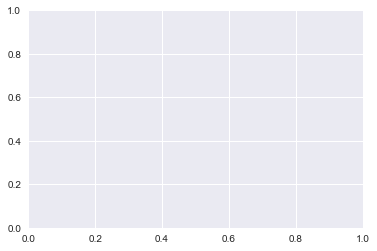

In [33]:
# You can get them like this
figure = plt.figure()
axes = plt.axes()

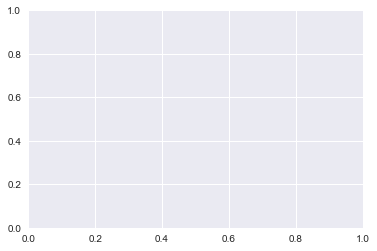

In [34]:
# Or you can use the `plt.subplots()` method 
# as a shortcut. You'll come back to using this
# later when you have multiple axes in a
# single figure.

# This is the style I'll generally use.
figure, axes = plt.subplots()

**Congratulations!** You've made your first plots. Aren't they beautiful?

Well, maybe that is a bit of a stretch. After all, the don't actually have anything on them.
Let's fix that.

### Plotting Your First Data
Let's plot the heights of the players.

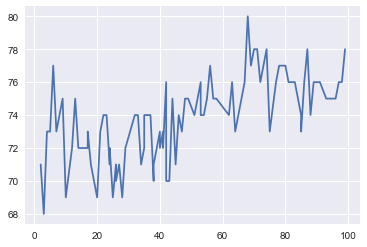

In [35]:
# Get the objects
figure, axes = plt.subplots()

# Use the `plot()` method to "write" data on your axes.
# The first argument is used as the x-axis
# The second is used for the y-axis
axes.plot(nd_football_roster.index, nd_football_roster['Height'])

You can display multiple datasets on a single **`axes`** object. Let's divide the *`nd_football_roster['Height']`* series into two parts and display them as separate lines.

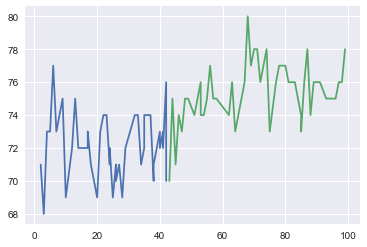

In [38]:
figure, axes = plt.subplots()

# The dataset has 90 players, so we display 45 of them
# on each call to the `plot()` method.
axes.plot(nd_football_roster.index[:45], nd_football_roster['Height'][:45])
axes.plot(nd_football_roster.index[45:], nd_football_roster['Height'][45:])

### Adjusting Line Properties
There are a number of line properties that you can adjust via keyword parameters to the *`plot()`*. 

Let's explore a few of them here: `alpha`, `color`, `linestyle`, `linewidth`, `marker` and `markersize`.

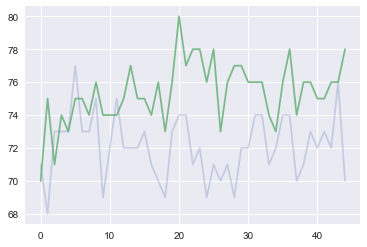

In [39]:
figure, axes = plt.subplots()

# The alpha parameter determines how transparent a line will be.
axes.plot(np.arange(0,45), nd_football_roster['Height'][:45], alpha=.25)
axes.plot(np.arange(0,45), nd_football_roster['Height'][45:], alpha=.75)

Matplotlib allows you to specify color choices in a very wide variety of ways. In the following example, I'll divide up our players into groups of ten to show some of the various ways to specify line color.

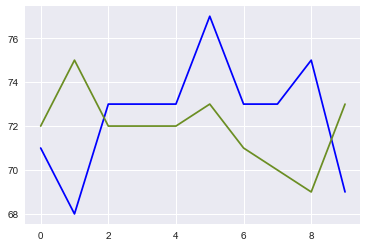

In [43]:
figure, axes = plt.subplots()

# SURPRISE... the color parameter controls the color of your line.

# You can specify any HTML color. 
# https://www.w3schools.com/colors/colors_names.asp
axes.plot(np.arange(0,10), nd_football_roster['Height'][:10], 
          color='blue')
axes.plot(np.arange(0,10), nd_football_roster['Height'][10:20],
          color='OliveDrab')


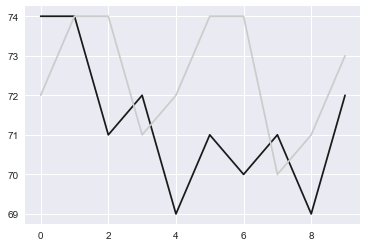

In [44]:
figure, axes = plt.subplots()

# Floats between 0 and 1 specify grayscale values
# But notice they have to be passed as strings
axes.plot(np.arange(0,10), nd_football_roster['Height'][20:30], 
          color='.1')
axes.plot(np.arange(0,10), nd_football_roster['Height'][30:40], 
          color='.8')

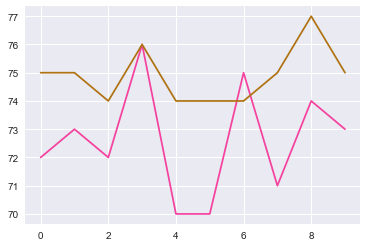

In [45]:
figure, axes = plt.subplots()

# Hex Codes are acceptable (#RRGGBB)
# Google for: hex color picker
axes.plot(np.arange(0,10), nd_football_roster['Height'][40:50], 
          color='#f4429e')
axes.plot(np.arange(0,10), nd_football_roster['Height'][50:60], 
          color='#af7313')


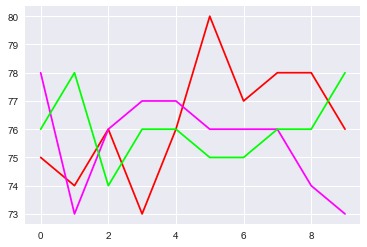

In [46]:
figure, axes = plt.subplots()

# You can even specify RGB tuples
# Each component of the tuple is a float between 0 and 1
axes.plot(np.arange(0,10), nd_football_roster['Height'][60:70], 
          color=(1.0, 0, 0)) # Total Red
axes.plot(np.arange(0,10), nd_football_roster['Height'][70:80], 
          color=(1.0, 0, 1.0)) # Pure Purple
axes.plot(np.arange(0,10), nd_football_roster['Height'][80:90], 
          color=(0.0, 1.0, 0.0)) # Gorgeous Green

#### Line Style
The *`linestyle`* parameter can take any of the options in the following table. You can specify either the or the symbol of the option:

| Name | Symbol|
|--------|-------|
| solid  | -     |
| dashed | --    |
| dashdot  | -.     |
| dotted  | :     |
|--------|-------|

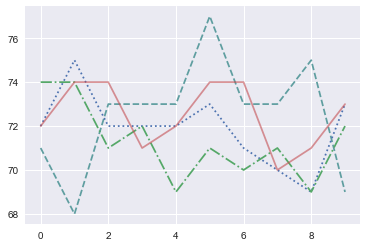

In [47]:
figure, axes = plt.subplots()

# Specifying with name
axes.plot(np.arange(0,10), nd_football_roster['Height'][:10], 
          color='CadetBlue', linestyle='dashed')
axes.plot(np.arange(0,10), nd_football_roster['Height'][10:20], 
          linestyle='dotted')

# Specifying with symbol
axes.plot(np.arange(0,10), nd_football_roster['Height'][20:30], 
          linestyle='-.')
axes.plot(np.arange(0,10), nd_football_roster['Height'][30:40], 
          linestyle='-', alpha=.6)

#### Line Width

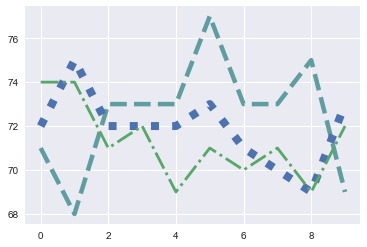

In [48]:
# Control Line Width with the `linewidth` parameter
figure, axes = plt.subplots()

axes.plot(np.arange(0,10), nd_football_roster['Height'][:10], 
          color='CadetBlue', linestyle='dashed', linewidth=4.5)

axes.plot(np.arange(0,10), nd_football_roster['Height'][10:20], 
          linestyle='dotted', linewidth=8)

axes.plot(np.arange(0,10), nd_football_roster['Height'][20:30], 
          linestyle='-.', linewidth=2.8)

#### Markers
If you so desire, you can add a "mark" at each data point in your plots through a combination of the *`marker`* and *`markersize`* parameters. 

All of the available marker styles are <a href='https://matplotlib.org/api/markers_api.html#module-matplotlib.markers' target='_blank'>detailed in Matplotlib's online documentation.</a>

Here are some examples of how to use these two parameters.

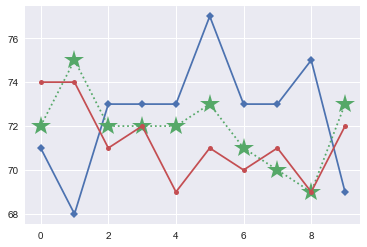

In [49]:
figure, axes = plt.subplots()

# Use diamond markers
axes.plot(np.arange(0,10), nd_football_roster['Height'][:10], 
          marker='D', markersize=5)

# You can combine linestyle and markers
# Here we will use a star marker
axes.plot(np.arange(0,10), nd_football_roster['Height'][10:20], 
          linestyle='dotted', marker='*', markersize=20)

# Circle Markers
axes.plot(np.arange(0,10), nd_football_roster['Height'][20:30],
          marker='o', markersize=5)

### Adjusting Axes Limits
If we go back to our original plot, we can see that Matplotlib automatically sets the limits of the x-axis and y-axis values based on the data that we give it.

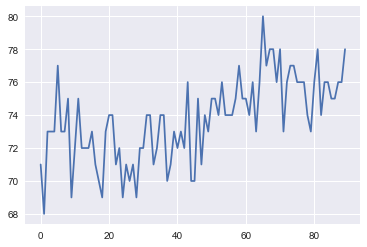

In [50]:
figure, axes = plt.subplots()
axes.plot(np.arange(0, 90), nd_football_roster['Height'])

You do not have to accept these default values however. Using the *`set_xlim`* and *`set_ylim`* methods of the **`axes`** object, we can visually focus on a subset of the data.

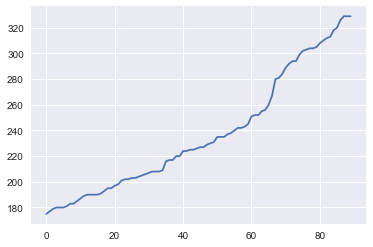

In [51]:
figure, axes = plt.subplots()

# Let's display the sorted the weights of the players on the team.
axes.plot(np.arange(0, 90), 
          nd_football_roster['Weight'].sort_values())

(70, 90)

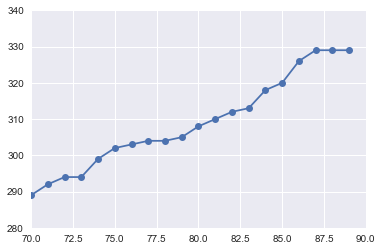

In [52]:
figure, axes = plt.subplots()

# And then use the `set_ylim` method to focus in on the players 
# who weigh between 280 and 340 lbs and whose x-axis values
# are between 70 and 90
axes.plot(np.arange(0, 90), 
          nd_football_roster['Weight'].sort_values(), 
          marker='o')

axes.set_ylim(280, 340)
axes.set_xlim(70, 90)

<div class="alert alert-block alert-warning">
<h5>Misleading Graph: Setting limits to x-axis and y-axis</h5>
<p> </p> 
<p>
It is very easy to mislead with data visualizations by setting (or not setting) the limits to the axes. Look at the following example. I recommend to use the scale that makes sense in the current context 
</p>
</div> 

(0, 100)

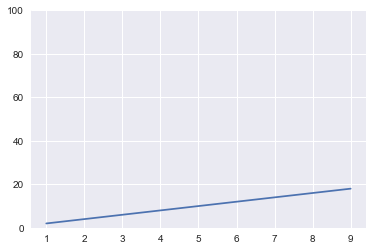

In [57]:
months = np.arange(1,10)
profits = 2*months

figure, axes = plt.subplots()
axes.plot(months, profits)
axes.set_ylim(0, 100)

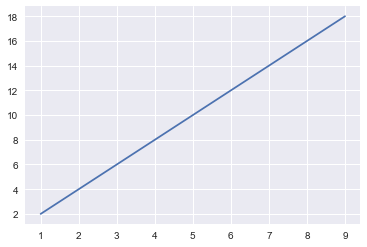

In [56]:
months = np.arange(1,10)
profits = 2*months

figure, axes = plt.subplots()
axes.plot(months, profits)

### Adding Plot Metadata (Labels)
Now that we've covered the basics of plotting lines, let's turn our attention to adding plot metadata.

#### Plot Titles

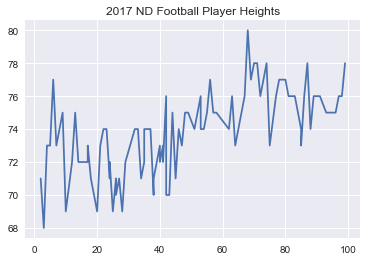

In [58]:
# Add plot title with axes.set_title() method.
figure, axes = plt.subplots()
axes.plot(nd_football_roster.index, nd_football_roster['Height'])
axes.set_title(label='2017 ND Football Player Heights')

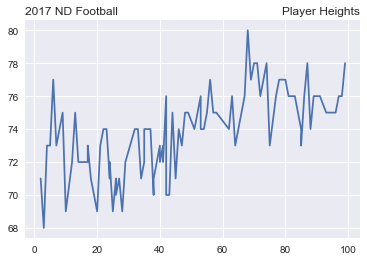

In [59]:
# You can adjust the horizontal alignment 
# of the title with the `loc` parameter.
# The value must be one of the following: left, center, right
figure, axes = plt.subplots()
axes.plot(nd_football_roster.index, nd_football_roster['Height'])

# Notice that if you specify location, 
# you can have multiple titles.
axes.set_title(label='2017 ND Football', loc='left')
axes.set_title(label='Player Heights', loc='right')

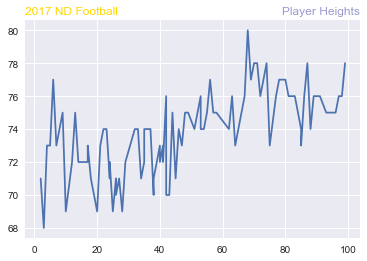

In [60]:
figure, axes = plt.subplots()
axes.plot(nd_football_roster.index, nd_football_roster['Height'])

# Here we will adjust the color and alpha properties
axes.set_title(label='2017 ND Football', loc='left', color='gold')
axes.set_title(label='Player Heights', loc='right', 
               color='darkblue', alpha=.4)

#### Axis Labels
Are plot is starting to look pretty cool, but we don't really know what the units of measurement are. We can fix that with the *`set_ylabal()`* and *`set_xlabel`* methods.

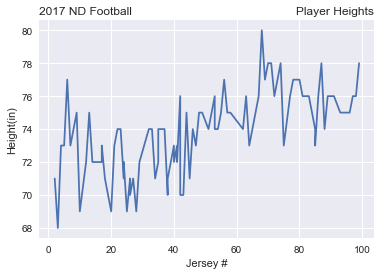

In [61]:
figure, axes = plt.subplots()
axes.plot(nd_football_roster.index, nd_football_roster['Height'])

axes.set_title(label='2017 ND Football', loc='left')
axes.set_title(label='Player Heights', loc='right')

axes.set_ylabel('Height(in)')
axes.set_xlabel('Jersey #')

With that additional information, our plot can be understood by other users. You can also control the color and opacity of these labels just as you can with the plot titles:

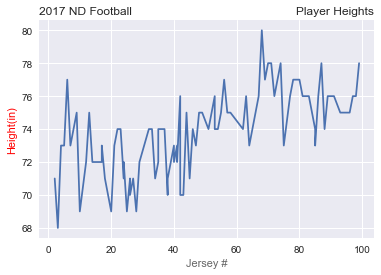

In [62]:
figure, axes = plt.subplots()
axes.plot(nd_football_roster.index, nd_football_roster['Height'])

axes.set_title(label='2017 ND Football', loc='left')
axes.set_title(label='Player Heights', loc='right')

axes.set_ylabel('Height(in)', color='red')
axes.set_xlabel('Jersey #', alpha=.7)

#### Plot Legends
In order to complete our plot, we need one more thing: a legend.
Like most things in Matplotlib, adding a basic one is simple - but with many customization options.

In [ ]:
figure, axes = plt.subplots()

# We will divide our team into two squads for
# illustrative purposes.
axes.plot(np.arange(0,45), nd_football_roster['Height'][:45], 
          linestyle='--')
axes.plot(np.arange(0,45), nd_football_roster['Height'][45:])

axes.set_title(label='2017 ND Football', loc='left')
axes.set_title(label='Player Heights', loc='right')

axes.set_ylabel('Height(in)')
axes.set_xlabel('Jersey #')

# Initialize the plot legend 
axes.legend()

Let's take note of a few things that Matplotlib does for the default legend:
1. It generates a legend item from each plotted line.
2. It matches the style of the line with the style in the legend.
3. It derives the name of each legend from the data being plotted if
possible.

As you can see, having both lines labels as 'Height' isn't the most ideal. Let's manually set a label for each of our lines so that the **`legend()`** method can pick them up.

In [ ]:
figure, axes = plt.subplots()

# We set the labels for each line.
axes.plot(np.arange(0,45), nd_football_roster['Height'][:45], 
          linestyle='--', label='Squad A')
axes.plot(np.arange(0,45), nd_football_roster['Height'][45:], 
          label='Squad B')

axes.set_title(label='2017 ND Football', loc='left')
axes.set_title(label='Player Heights', loc='right')

axes.set_ylabel('Height(in)')
axes.set_xlabel('Jersey #')

# Initialize the plot legend 
axes.legend()

There are a number of other arguments/parameters that you can specify to further customize plot legends. Let's go over a few of them:

In [ ]:
figure, axes = plt.subplots()

# We set the labels for each line.
axes.plot(np.arange(0,45), nd_football_roster['Height'][:45], 
          linestyle='--', label='Squad A')
axes.plot(np.arange(0,45), nd_football_roster['Height'][45:], 
          label='Squad B')

axes.set_title(label='2017 ND Football', loc='left')
axes.set_title(label='Player Heights', loc='right')

axes.set_ylabel('Height(in)')
axes.set_xlabel('Jersey #')

# Use the `loc` argument to control where the
# legend appears in your plot. Valid options:
# upper left, upper center, upper right
# center left, center, center right
# lower left, lower center, lower right
axes.legend(loc='lower right')

You can set a title for the legend itself:

In [ ]:
figure, axes = plt.subplots()
axes.plot(np.arange(0,45), nd_football_roster['Height'][:45], 
          linestyle='--', label='Squad A')
axes.plot(np.arange(0,45), nd_football_roster['Height'][45:], 
          label='Squad B')

axes.set_title(label='2017 ND Football', loc='left')
axes.set_title(label='Player Heights', loc='right')

axes.set_ylabel('Height(in)')
axes.set_xlabel('Jersey #')

axes.legend(title='Legend')

You can add edges and background colors to a legend:

In [ ]:
figure, axes = plt.subplots()
axes.plot(np.arange(0,45), nd_football_roster['Height'][:45], 
          linestyle='--', label='Squad A')
axes.plot(np.arange(0,45), nd_football_roster['Height'][45:], 
          label='Squad B')

axes.set_title(label='2017 ND Football', loc='left')
axes.set_title(label='Player Heights', loc='right')

axes.set_ylabel('Height(in)')
axes.set_xlabel('Jersey #')

# You can specify background and edge colors for the 
# legend if you also specify `frameon=True`
axes.legend(title='Legend', frameon=True, 
            edgecolor='black', facecolor='gold')

You can adjust the number of columns in a legend. This is handy if you want the legend to take up less vertical space.

In [ ]:
figure, axes = plt.subplots()
axes.plot(np.arange(0,45), nd_football_roster['Height'][:45], 
          linestyle='--', label='Squad A')
axes.plot(np.arange(0,45), nd_football_roster['Height'][45:], 
          label='Squad B')

axes.set_title(label='2017 ND Football', loc='left')
axes.set_title(label='Player Heights', loc='right')

axes.set_ylabel('Height(in)')
axes.set_xlabel('Jersey #')

# Use the `ncol` argument to specify the
# number of columns.
axes.legend(ncol=2, loc='lower right')

And finally, you can adjust the size of the font used in the legend:

In [ ]:
figure, axes = plt.subplots()
axes.plot(np.arange(0,45), nd_football_roster['Height'][:45], 
          linestyle='--', label='Squad A')
axes.plot(np.arange(0,45), nd_football_roster['Height'][45:], 
          label='Squad B')

axes.set_title(label='2017 ND Football', loc='left')
axes.set_title(label='Player Heights', loc='right')

axes.set_ylabel('Height(in)')
axes.set_xlabel('Jersey #')

# Use `fontsize` to adjust the legend font size.
axes.legend(ncol=2, loc='lower right', fontsize=14)

<div class="alert alert-block alert-warning">
## Important things to keep in mind while plotting simple line plots
</div>
1. Make sure your data appears appropriately with xlim and ylim
2. Line properties
    * color
    * linestyle
    * linewidth
    * marker
3. Plot Metadata
    * set_title
    * set_xlabel, set_ylabel
    * legend

# Activity

In this activity we will use the flight_sample.csv dataset. We will learn both the group by and plotting the data. 

### GroupBy 'MONTH' and Plotting

We want to see if the day of the week has any effect on average distance traveled by airline customers

1. Compute the average DISTANCE per 'MONTH'
    * This part was already done for you!
2. Visualize the average distance travelled and the day of the week
    * Plot with x-axis as the day of the week and y-axis as the average distance traveled
    * Make sure you set the title, xlabel, ylabel. 

In [ ]:
flights_by_month = flights.groupby(['MONTH'])
distance_avg = flights_by_month[['DISTANCE']].mean()
distance_avg


### GroupBy 'MONTH' and Plotting

We will do the similar analysis as above, but separately for two airlines, United Airlines (UA) and Hawaiin Airlines (HA)

1. Compute the median DISTANCE per 'MONTH' for United Airlines and Hawaiin Airlines separately 
    * This part was already done for you!
2. Visualize the average distance travelled and the day of the week by United Airlines and Hawaiin Airlines 
    * Plot with x-axis as the day of the week and y-axis as the average distance traveled
    * Plot metadata
        * Set the title
        * xlabel and ylabel
        * Give United Airlines a green color and Hawaiin Airlines a red color
        * Give appropriate legend indicating the lines for United and Hawaiin Airlines

In [ ]:
flights_by_airline_month = flights.groupby(['AIRLINE', 'MONTH'])
distance_avg_airline = flights_by_airline_month[['DISTANCE']].median()

ua_distance_avg = distance_avg_airline.loc['UA']
ha_distance_avg = distance_avg_airline.loc['HA']